In [93]:
import pandas as pd
# Assuming the file is named 'student_scores.csv' and is in the same directory
df = pd.read_csv('student_scores.csv')

In [94]:
df['result'] = df['Scores'].apply(lambda x: 1 if x >= 50 else 0)

In [95]:
df.head()

,Hours,Scores,result
0,2.5,21,0
1,5.1,47,0
2,3.2,27,0
3,8.5,75,1
4,3.5,30,0


In [96]:
df['result'].value_counts()

,count
result,
0,13
1,12


In [97]:
from sklearn.model_selection import train_test_split
x = df[['Hours']]
y = df['result']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [98]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression() # we use this for binary classification in our case fail or pass 0 or 1
model.fit(x_train, y_train)

LogisticRegression()

In [99]:
y_pred = model.predict(x_test)

In [100]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred)) # the accuracy of the prediction compared to the real value(nearest to 1 the better)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred)) # true negative at 11, false positive at 12, false negative at 21, true positive at 22 (the better that the off diagonal be 0)
print("\nClassification Report:\n", classification_report(y_test, y_pred)) # Provides a detailed report on how well the model predicted for each class (pass/fail)

Accuracy: 1.0

Confusion Matrix:
 [[2 0]
 [0 3]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



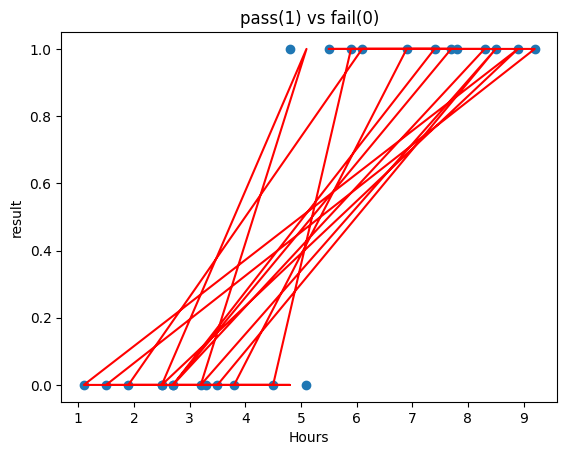

In [101]:
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.plot(x,model.predict(x), color='red')
plt.xlabel('Hours')
plt.ylabel('result')
plt.title('pass(1) vs fail(0)')
plt.show()

In [102]:
model.predict([[9.35]])

array([1])

In [103]:
model.predict([[4.9]])

array([0])

In [104]:
model.predict([[5.1]])

array([1])

In [105]:
t = df[['Hours']]
r = df['result']
t_test, t_train,r_test, r_train = train_test_split(t,r,test_size =0.5,random_state=23)

In [106]:
# just trying it's abilities and how will it will perform with lower training data, suprisingly it did just as good a job

In [107]:
model2 = LogisticRegression()
model2.fit(t_train,r_train)

LogisticRegression()

In [108]:
r_pred=model2.predict(t_test)

In [109]:
print("Accuracy:", accuracy_score(r_test, r_pred))
print("\nConfusion Matrix:\n", confusion_matrix(r_test, r_pred))
print("\nClassification Report:\n", classification_report(r_test, r_pred))

Accuracy: 1.0

Confusion Matrix:
 [[4 0]
 [0 8]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         8

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



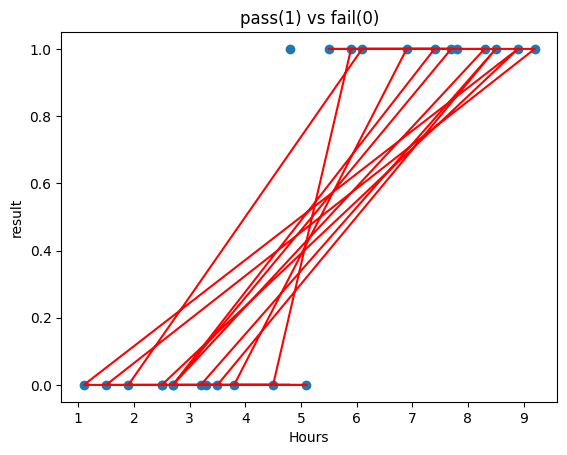

In [110]:
plt.scatter(t,r)
plt.plot(t,model2.predict(t), color='red')
plt.xlabel('Hours')
plt.ylabel('result')
plt.title('pass(1) vs fail(0)')
plt.show()

In [111]:
model2.predict([[4.5]])

array([0])

In [112]:
model2.predict([[5.42]])

array([1])

In [113]:
df2 = pd.read_csv('student_scorminu.csv')

added an anamoly to the data set to further test the model

In [114]:
df2['result'] = df2['Scores'].apply(lambda x: 1 if x >= 50 else 0)

In [115]:
k = df2[['Hours']]
d = df2['result']
k_test, k_train,d_test, d_train = train_test_split(k,d,test_size =0.2,random_state=23)

In [116]:
model3 = LogisticRegression()
model3.fit(k_train,d_train)

LogisticRegression()

In [117]:
d_pred=model3.predict(k_test)

In [118]:
print("Accuracy:", accuracy_score(d_test, d_pred))
print("\nConfusion Matrix:\n", confusion_matrix(d_test, d_pred))
print("\nClassification Report:\n", classification_report(d_test, d_pred))

Accuracy: 0.85

Confusion Matrix:
 [[8 3]
 [0 9]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.73      0.84        11
           1       0.75      1.00      0.86         9

    accuracy                           0.85        20
   macro avg       0.88      0.86      0.85        20
weighted avg       0.89      0.85      0.85        20



In [ ]:
# the accuracy went down and we have 3 false positive with f-1 and accuracy of 0.84 and 0.85 respectively

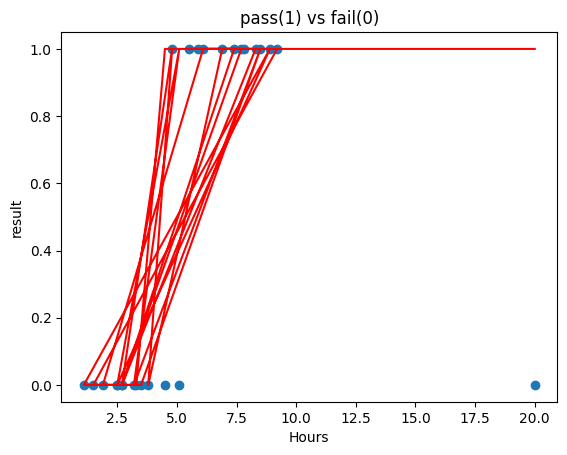

In [119]:
plt.scatter(k,d)
plt.plot(k,model3.predict(k), color='red')
plt.xlabel('Hours')
plt.ylabel('result')
plt.title('pass(1) vs fail(0)')
plt.show()

In [129]:
model3.predict([[4.29]]) #the minimum needed to pass

array([1])

In [121]:
model3.predict([[5.42]])

array([1])